# Reddit Project on Data Science

This project is to web scrape data science related information from Reddit, the social news aggregation, web content rating, and discussion website. We aim to collect general in

In [1]:
# Load necessary libraries
import praw
import pandas as pd
import PIL
import numpy as np
from wordcloud import WordCloud
from datetime import datetime
from praw.models import MoreComments

### Reddit's Sorting Method:

Within a subreddit, there are multiple post submissions. Reddit provides us multiple ways to sort the submissions:
- rising: submissions that are getting a lot of activities (comments/upvotes) right now
- new: latest submissions by time
- hot: submissions that have been getting a lot of upvotes/comments
- gilded: comments that have been given reddit gold by someone
- controversial: submissions that have been getting multiple downvotes and upvotes. 
- top: submissions that have gotten the most upvotes over the set period 

### Authentication
First, we need to authenticate ourselves. In order to authenticate ourselves, we need to first create an app on reddit by filling in a name, description and redirect uri. After creating the app, we can use the authentication information to create the praw.Reddit instance. 

In [2]:
# we need to first authenticate ourselves
reddit = praw.Reddit(client_id='Z1grqQBW7ei7hA', client_secret='ekx286gd903s742SoxFSc7mF-kg', 
                     user_agent='simon_tutorial', redirect_uri="http://localhost:8080", username='simonneedsleep', 
                     password='ZXW1025reddit!')

# check the username
print(reddit.user.me())

simonneedsleep


### Get subreddit data
For the next step, we need to collect subreddit on data science relevant topics. The subreddits that we want to explore are r/DataScience, r/DataScienceJobs, r/MachineLearning, etc. For the moment, we will be looking at **r/DataScience** subreddit. We will collect the top 50 'hot' posts. 

In [3]:
## Scrape the DataScience subreddit
posts_hot = []
posts_top = []
ds_subreddit = reddit.subreddit('DataScience')
#ds_subreddit = reddit.subreddit('MachineLearning')


# Obtain the top 50 hot posts
for post in ds_subreddit.hot(limit=50):
    # convert timestamp to datetime
    posts_hot.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, datetime.fromtimestamp(post.created)])
posts_hot = pd.DataFrame(posts_hot,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

# Obtain the top 50 top posts
for post in ds_subreddit.hot(limit=50):
    # convert timestamp to datetime
    posts_top.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, datetime.fromtimestamp(post.created)])
posts_top = pd.DataFrame(posts_top,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

Let's take a look at the dataframe of the top 50 hot posts, sorted by score:

In [ ]:
posts_hot.sort_values(by = 'score', ascending = False)

Let's take a look at the dataframe of the top 50 top posts, sorted by score:

In [ ]:
posts_top.sort_values(by = 'score', ascending = False)

We then concatenate the two dataframes and then remove the duplicates.

In [8]:
posts_ds = pd.concat([posts_top, posts_hot], axis=0).drop_duplicates(subset = 'id').reset_index(drop = True)

posts_ds.sort_values(by = 'score', ascending = False).reset_index(drop = True).head()

,title,score,id,subreddit,url,num_comments,body,created
0,Elon Musk has said he will demonstrate a funct...,633,igwruq,datascience,https://www.independent.co.uk/life-style/gadge...,112,,2020-08-26 15:00:14
1,How did you choose between focusing on statist...,167,igc2gd,datascience,https://www.reddit.com/r/datascience/comments/...,79,"And if you had a do-over, would you switch you...",2020-08-25 17:21:27
2,is there a collection of pseudocode for basic ...,142,ihhwq5,datascience,https://www.reddit.com/r/datascience/comments/...,26,I wanted to look for a collection of pseudocod...,2020-08-27 13:25:50
3,200+ KDD 2020 paper talks are available now wi...,127,igiywu,datascience,https://www.reddit.com/r/datascience/comments/...,3,**Here is a** [**comprehensive collection of p...,2020-08-25 23:17:04
4,How impressive is a Kaggle Bronze Medal as a H...,112,igpewk,datascience,https://www.reddit.com/r/datascience/comments/...,39,Basically the title: I received a Bronze medal...,2020-08-26 05:18:47


### Load the dataset

In [ ]:
## save the dataframe locally
#print(posts_ds.shape)
#posts_ds.to_csv('data/posts.csv')

## load the saved dataframe
#posts_ds = pd.read_csv('data/posts.csv', index_col = 0)

We plot a scatter plot of the number of comments against score for posts that have at least one comment. 

Text(0, 0.5, 'Number of Comments')

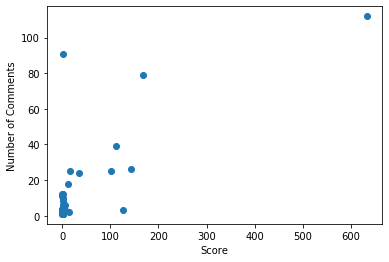

In [10]:
import matplotlib.pyplot as plt
sub_posts = posts_ds[posts_ds['num_comments'] > 0]
plt.scatter(sub_posts['score'], sub_posts['num_comments'], marker='o')
plt.xlabel('Score')
plt.ylabel('Number of Comments')

In [11]:
### Combine the title and the body columns to create a text str column
posts_ds['text'] = posts_ds['title'] + posts_ds['body']

In [12]:
### Needs to process the title and the body as well
import re

## Remove empty space:
posts_ds['text'] = posts_ds['text'].map(lambda x: re.sub('\s+', ' ', x))

## Convert all string to lower cases:
posts_ds['text'] = posts_ds['text'].str.lower()

## Remove all the punctuations:
posts_ds['text'] = posts_ds['text'].map(lambda x: re.sub('[^\w\s]', '', x))
## need to think about the dash

## Take a look at the processed df
posts_ds.head()

,title,score,id,subreddit,url,num_comments,body,created,text
0,Weekly Entering & Transitioning Thread | 23 Au...,1,if1yuu,datascience,https://www.reddit.com/r/datascience/comments/...,91,Welcome to this week's entering & transitionin...,2020-08-23 16:00:30,weekly entering transitioning thread 23 aug ...
1,is there a collection of pseudocode for basic ...,142,ihhwq5,datascience,https://www.reddit.com/r/datascience/comments/...,26,I wanted to look for a collection of pseudocod...,2020-08-27 13:25:50,is there a collection of pseudocode for basic ...
2,How to approach defining a problem/objective?,2,ihqpzg,datascience,https://www.reddit.com/r/datascience/comments/...,2,Over the past few months I feel like I have de...,2020-08-27 22:39:20,how to approach defining a problemobjectiveove...
3,I'm looking for some recommendations on data l...,6,ihk9l3,datascience,https://www.reddit.com/r/datascience/comments/...,3,I'm looking for some recommendations on data l...,2020-08-27 16:38:19,im looking for some recommendations on data la...
4,Elon Musk has said he will demonstrate a funct...,633,igwruq,datascience,https://www.independent.co.uk/life-style/gadge...,112,,2020-08-26 15:00:14,elon musk has said he will demonstrate a funct...


In [13]:
### Remove stopwords
import nltk
from nltk.corpus import stopwords
# the stop words list by nltk
stop_words = stopwords.words('english')

# extra stop words that we need to remove
more_stop_words = ['could', 'really', 'would', 'uses','use','using','used','one','also','days', 'im', 'dont', 
                   'say', 'can', 'not', 'id', 'like', 'youre', 'ive', 'arent', 'something', 'many', 'etc', 'even']

# define a collection of words related to data science education
key_words = ['project', 'course', 'degree', 'masters', 'program', 'experience', 'bootcamp', 'courses', 
             'projects', 'certificates', 'ms', 'phd', 'kaggle', 'capstone']

# online programs
key_words_online = ['online', 'programs', 'program', 'udemy', 'udacity', 'certificates', 'certificate', 'khan']

# programming language
key_words_language = ['python', 'r', 'sql']

In [14]:
posts_ds['text'] = posts_ds['text'].map(lambda text: " ".join(word for word in text.split() if word not in stop_words))

posts_ds['text'] = posts_ds['text'].map(lambda text: " ".join(word for word in text.split() if word not in more_stop_words))

### tokenization
import nltk
from nltk.tokenize import word_tokenize 
#nltk.download('punkt')

# tokenize the words
posts_ds['Tokens'] = posts_ds['text'].map(lambda x: word_tokenize(x))

posts_ds.head()

,title,score,id,subreddit,url,num_comments,body,created,text,Tokens
0,Weekly Entering & Transitioning Thread | 23 Au...,1,if1yuu,datascience,https://www.reddit.com/r/datascience/comments/...,91,Welcome to this week's entering & transitionin...,2020-08-23 16:00:30,weekly entering transitioning thread 23 aug 20...,"[weekly, entering, transitioning, thread, 23, ..."
1,is there a collection of pseudocode for basic ...,142,ihhwq5,datascience,https://www.reddit.com/r/datascience/comments/...,26,I wanted to look for a collection of pseudocod...,2020-08-27 13:25:50,collection pseudocode basic algorithms data sc...,"[collection, pseudocode, basic, algorithms, da..."
2,How to approach defining a problem/objective?,2,ihqpzg,datascience,https://www.reddit.com/r/datascience/comments/...,2,Over the past few months I feel like I have de...,2020-08-27 22:39:20,approach defining problemobjectiveover past mo...,"[approach, defining, problemobjectiveover, pas..."
3,I'm looking for some recommendations on data l...,6,ihk9l3,datascience,https://www.reddit.com/r/datascience/comments/...,3,I'm looking for some recommendations on data l...,2020-08-27 16:38:19,looking recommendations data labelling toolsim...,"[looking, recommendations, data, labelling, to..."
4,Elon Musk has said he will demonstrate a funct...,633,igwruq,datascience,https://www.independent.co.uk/life-style/gadge...,112,,2020-08-26 15:00:14,elon musk said demonstrate functional braincom...,"[elon, musk, said, demonstrate, functional, br..."


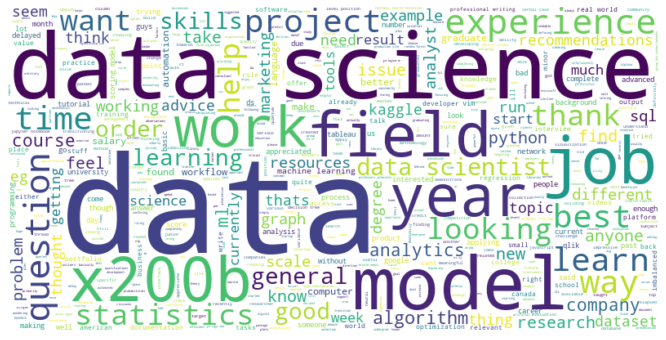

In [15]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height = 400)
# generate word cloud
wc.generate(' '.join(posts_ds['text']))
#wc.generate(' '.join(ds_comments_raw['Tokens']))

import matplotlib.pyplot as plt
%matplotlib inline

# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
from nltk.probability import FreqDist # this also uses Counter. 


print(FreqDist(' '.join(posts_ds['text']).split()).most_common(50))
#' '.join(ds_comments_raw['Comments']).split()

[('data', 105), ('science', 48), ('x200b', 19), ('field', 18), ('model', 18), ('job', 17), ('get', 17), ('learning', 16), ('experience', 16), ('work', 15), ('best', 14), ('learn', 14), ('models', 14), ('way', 14), ('time', 13), ('looking', 12), ('want', 12), ('statistics', 12), ('skills', 11), ('projects', 11), ('help', 11), ('good', 11), ('general', 11), ('analytics', 10), ('company', 10), ('ml', 10), ('1', 10), ('algorithms', 9), ('know', 9), ('python', 9), ('anyone', 9), ('find', 9), ('research', 9), ('new', 9), ('year', 9), ('questions', 8), ('resources', 8), ('working', 8), ('question', 8), ('take', 8), ('different', 8), ('x', 8), ('years', 8), ('since', 8), ('sql', 8), ('order', 8), ('marketing', 8), ('eg', 7), ('thanks', 7), ('feel', 7)]


In [62]:
post_df = posts_ds['text'].str.contains('|'.join(key_words), regex = True).value_counts()
#pd.DataFrame(ds_df, columns=["Contains", "Count"])

#ds_df.reset_index()

#ds_df.reset_index().plot.bar(x='index', y='Comments', rot=0)
#pd.DataFrame(post_df, columns = ['Post'])

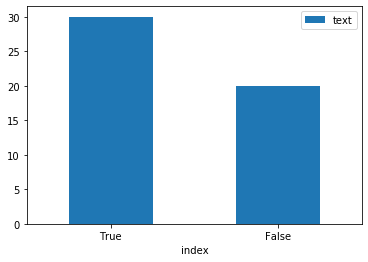

In [67]:
pd.DataFrame(post_df).reset_index().plot.bar(x='index', y='text', rot=0)

### Get comments from these posts
After collecting the subreddit, we then want to get comments from a specific post. 

In [17]:
# Store the comments in a dictionary for the subreddit CHANGE the representation to df
dict_comments = {}

# Get the id of the post
keys = posts_ds.id
for key in keys:
    submission = reddit.submission(id = key)
    for top_level_comment in submission.comments:
        try:
            dict_comments[key].append(top_level_comment.body)
        except KeyError:
            dict_comments[key] = [top_level_comment.body]

In [18]:
# Flatten the dictionary to a dataframe
ds_comments_raw = pd.DataFrame(list(dict_comments.items()), columns=['ID', 'Comments'])

# Transform each element of a list-like to a row, replicating index values
ds_comments = ds_comments_raw.explode('Comments')
ds_comments_raw.head()

,ID,Comments
0,if1yuu,"[Hi, I am a student from Bangladesh and I am s..."
1,ihhwq5,[Fwiw linear regression has a closed form solu...
2,ihqpzg,[One piece of advice I often give in these cas...
3,ihk9l3,[I've mostly been using [Label Studio](https:/...
4,igwruq,[introducing the future of machine-human inter...


In [20]:
ds_comments.head()

,ID,Comments
0,if1yuu,"Hi, I am a student from Bangladesh and I am st..."
0,if1yuu,"Hi all,\n\nHope everyone’s staying safe & heal..."
0,if1yuu,I’m a new grad who is trying to gain experienc...
0,if1yuu,"Hello, I’ve got a career path question. I’m cu..."
0,if1yuu,"Hello everyone,\n\nI'm currently learning the ..."


In [ ]:
### Save the dataframe to a local file
#ds_comments_raw.to_csv('data/comments.csv')
ds_comments.groupby('ID').count().shape

In [21]:
### Preprocessing
import re
## Join the list of string into one long string:
ds_comments_raw['Comments'] = ds_comments_raw['Comments'].str.join(' ')

## Remove empty space:
ds_comments_raw['Comments'] = ds_comments_raw['Comments'].map(lambda x: re.sub('\s+', ' ', x))

## Convert all string to lower cases:
ds_comments_raw['Comments'] = ds_comments_raw['Comments'].str.lower()

## Remove all the punctuations:
ds_comments_raw['Comments'] = ds_comments_raw['Comments'].map(lambda x: re.sub('[^\w\s]', '', x))
## need to think about the dash

## Take a look at the processed df
ds_comments_raw.head()

,ID,Comments
0,if1yuu,hi i am a student from bangladesh and i am sta...
1,ihhwq5,fwiw linear regression has a closed form solut...
2,ihqpzg,one piece of advice i often give in these case...
3,ihk9l3,ive mostly been using label studiohttpslabelst...
4,igwruq,introducing the future of machinehuman interac...


In [22]:
### Remove stopwords
import nltk
from nltk.corpus import stopwords

ds_comments_raw['Comments'] = ds_comments_raw['Comments'].map(lambda text: " ".join(word for word in text.split() if word not in stop_words))

ds_comments_raw['Comments'] = ds_comments_raw['Comments'].map(lambda text: " ".join(word for word in text.split() if word not in more_stop_words))

ds_comments_raw.head()

,ID,Comments
0,if1yuu,hi student bangladesh starting data science ma...
1,ihhwq5,fwiw linear regression closed form solution un...
2,ihqpzg,piece advice often give cases find interests c...
3,ihk9l3,mostly label studiohttpslabelstudio research p...
4,igwruq,introducing future machinehuman interaction co...


In [23]:
### tokenization
import nltk
from nltk.tokenize import word_tokenize 
#nltk.download('punkt')

# tokenize the words
ds_comments_raw['Tokens'] = ds_comments_raw['Comments'].map(lambda x: word_tokenize(x))

ds_comments_raw.head()

,ID,Comments,Tokens
0,if1yuu,hi student bangladesh starting data science ma...,"[hi, student, bangladesh, starting, data, scie..."
1,ihhwq5,fwiw linear regression closed form solution un...,"[fwiw, linear, regression, closed, form, solut..."
2,ihqpzg,piece advice often give cases find interests c...,"[piece, advice, often, give, cases, find, inte..."
3,ihk9l3,mostly label studiohttpslabelstudio research p...,"[mostly, label, studiohttpslabelstudio, resear..."
4,igwruq,introducing future machinehuman interaction co...,"[introducing, future, machinehuman, interactio..."


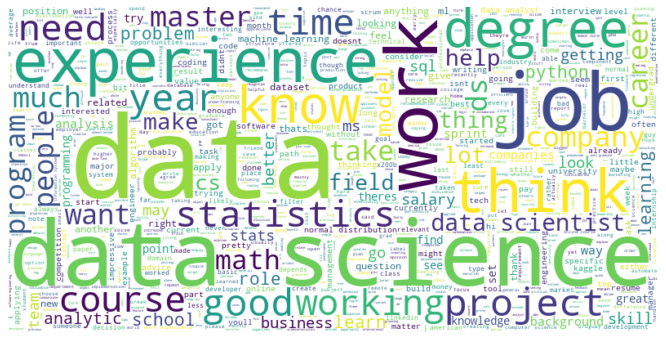

In [24]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height = 400)
# generate word cloud
wc.generate(' '.join(ds_comments_raw['Comments']))
#wc.generate(' '.join(ds_comments_raw['Tokens']))

import matplotlib.pyplot as plt
%matplotlib inline

# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
from textblob import TextBlob
TextBlob(ds_comments_raw['Comments'][0]).ngrams(2)

[WordList(['hi', 'student']),
 WordList(['student', 'bangladesh']),
 WordList(['bangladesh', 'starting']),
 WordList(['starting', 'data']),
 WordList(['data', 'science']),
 WordList(['science', 'major']),
 WordList(['major', 'university']),
 WordList(['university', 'texas']),
 WordList(['texas', 'dallas']),
 WordList(['dallas', 'passionate']),
 WordList(['passionate', 'data']),
 WordList(['data', 'science']),
 WordList(['science', 'selected']),
 WordList(['selected', 'major']),
 WordList(['major', 'barely']),
 WordList(['barely', 'second']),
 WordList(['second', 'thought']),
 WordList(['thought', 'eerie']),
 WordList(['eerie', 'feeling']),
 WordList(['feeling', 'might']),
 WordList(['might', 'taken']),
 WordList(['taken', 'bold']),
 WordList(['bold', 'decision']),
 WordList(['decision', 'taking']),
 WordList(['taking', 'cs']),
 WordList(['cs', 'safer']),
 WordList(['safer', 'bet']),
 WordList(['bet', 'afterwards']),
 WordList(['afterwards', 'focusing']),
 WordList(['focusing', 'data'])

In [26]:
## word frequency by post
from nltk.probability import FreqDist # this also uses Counter. 
for i in range(ds_comments_raw.shape[0]):
    print(FreqDist(ds_comments_raw['Tokens'][i]).most_common(5))

[('data', 157), ('science', 68), ('work', 28), ('experience', 27), ('degree', 26)]
[('pseudocode', 4), ('algorithms', 3), ('lot', 3), ('learning', 3), ('implementation', 2)]
[('data', 5), ('end', 3), ('building', 3), ('solve', 3), ('try', 3)]
[('label', 2), ('requires', 2), ('get', 2), ('image', 2), ('tool', 2)]
[('signals', 5), ('brain', 4), ('pump', 4), ('electric', 4), ('earing', 4)]
[('projects', 2), ('project', 2), ('sounds', 1), ('interesting', 1), ('never', 1)]
[('statistics', 1)]
[('frequency', 1), ('set', 1), ('12', 1), ('almost', 1), ('containing', 1)]
[('data', 23), ('sprint', 16), ('2', 12), ('science', 10), ('time', 10)]
[('data', 5), ('work', 3), ('know', 3), ('tools', 2), ('sql', 2)]
[('work', 6), ('academic', 4), ('analyst', 3), ('working', 3), ('people', 3)]
[('writing', 5), ('lot', 5), ('x200b', 4), ('across', 2), ('professional', 2)]
[('econ', 6), ('degree', 6), ('job', 6), ('data', 4), ('statistics', 3)]
[('ds', 11), ('statistics', 5), ('field', 3), ('jr', 3), ('phd

In [79]:
from nltk.probability import FreqDist # this also uses Counter. 


unigram_list = FreqDist(' '.join(ds_comments_raw['Comments']).split()).most_common(100)
#' '.join(ds_comments_raw['Comments']).split()

unigram_df = pd.DataFrame(unigram_list, columns=["Word", "Frequency"])

#unigram_df.plot.bar(x='Word', y='Frequency', rot=0)

In [73]:
unigram_list

[('data', 280),
 ('science', 125),
 ('work', 77),
 ('experience', 70),
 ('job', 69),
 ('get', 67),
 ('think', 58),
 ('degree', 56),
 ('know', 55),
 ('good', 51),
 ('time', 47),
 ('learning', 47),
 ('ds', 46),
 ('statistics', 46),
 ('working', 43),
 ('company', 43),
 ('need', 42),
 ('much', 41),
 ('masters', 39),
 ('want', 38),
 ('people', 37),
 ('career', 37),
 ('take', 36),
 ('math', 34),
 ('learn', 32),
 ('2', 32),
 ('make', 31),
 ('program', 31),
 ('lot', 30),
 ('cs', 29),
 ('project', 29),
 ('analytics', 29),
 ('python', 29),
 ('help', 28),
 ('courses', 28),
 ('field', 28),
 ('scientist', 27),
 ('go', 27),
 ('years', 26),
 ('projects', 25),
 ('analyst', 25),
 ('normal', 25),
 ('year', 24),
 ('better', 24),
 ('find', 24),
 ('salary', 24),
 ('business', 23),
 ('school', 23),
 ('stats', 23),
 ('may', 23),
 ('1', 23),
 ('distribution', 23),
 ('ms', 22),
 ('role', 21),
 ('getting', 21),
 ('machine', 21),
 ('sql', 21),
 ('look', 21),
 ('things', 21),
 ('background', 21),
 ('companies', 2

In [38]:
unigram_df = pd.DataFrame(unigram_list, columns=["Word", "Frequency"])

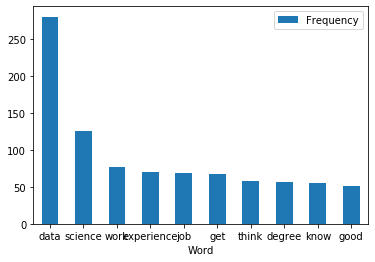

In [39]:
unigram_df.plot.bar(x='Word', y='Frequency', rot=0)

In [28]:
# Get the frequency of bigrams
from nltk.collocations import BigramCollocationFinder

text = ' '.join(ds_comments_raw['Comments'])
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(text))
    
for k,v in sorted(finder.ngram_fd.items(), key=lambda item: item[1], reverse=True):
    if v > 2:
        print(k, v)

('data', 'science') 111
('data', 'scientist') 27
('machine', 'learning') 19
('data', 'analyst') 16
('normal', 'distribution') 15
('work', 'experience') 9
('data', 'analytics') 9
('data', 'scientists') 9
('computer', 'science') 9
('masters', 'data') 7
('masters', 'degree') 6
('data', 'analysis') 6
('real', 'world') 6
('2', 'weeks') 6
('analyst', 'roles') 6
('working', 'data') 5
('hi', 'everyone') 5
('ms', 'data') 5
('go', 'back') 5
('make', 'sure') 5
('gain', 'experience') 4
('experience', 'data') 4
('hello', 'everyone') 4
('2', 'years') 4
('online', 'courses') 4
('work', 'data') 4
('post', 'graduate') 4
('1', 'year') 4
('comp', 'sci') 4
('pretty', 'good') 4
('help', 'get') 4
('job', 'market') 4
('software', 'engineering') 4
('time', 'series') 4
('able', 'find') 4
('electric', 'signals') 4
('want', 'know') 4
('pretty', 'much') 4
('can', 'not') 3
('projects', 'work') 3
('new', 'grad') 3
('career', 'path') 3
('experience', 'working') 3
('get', 'handson') 3
('ml', 'experience') 3
('everyon

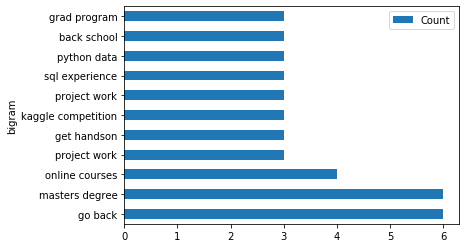

In [78]:
d = {'bigram': ['go back', 'masters degree', 'online courses', 'project work', 'get handson', 'kaggle competition', 'project work', 'sql experience', 'python data', 'back school', 'grad program'], 'Count': [6, 6, 4, 3, 3, 3, 3, 3, 3, 3, 3]}
df = pd.DataFrame(data=d)
df.plot.barh(x='bigram', y='Count', rot=0)

In [ ]:
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    print(top_level_comment.body)

### Data Exploration
- Look for the keywords, such as bootcamp, masters, program, learn (lectures), certified
- Build a wordcloud
- Top frequency
- n-grams (bi-gram: exponentially increases in your sample size)
- Look for stopwords (equivalent proxies, mooc)
- Look for new Data Science jobs (especially from the DataScienceJobs, or other related website)

#### What to look for?
- Look for the information to help with the models (what terms may signify the topics)
- How to extract topics? Manual label (regex)
- highly voted? highly response to? time series response? weekly hot? To reinforce the topics? No. comments.
- Think for how would I find information manually. And then automate it. 

In [ ]:
# Using spacy to process the comments
import spacy
nlp = spacy.load('en_core_web_sm')
example_doc = nlp(example_comment)

In [ ]:
for token in example_doc:
    if not token.is_stop and not token.is_punct:
        print(token)

In [ ]:
### put this into a function
from collections import Counter
# Remove stop words and punctuation symbols
words = [token.text for token in example_doc
       if not token.is_stop and not token.is_punct]

word_freq = Counter(words)

# 5 commonly occuring words with their frequencies
common_words = word_freq.most_common(5)
print(common_words)

# Unique words
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
#print(unique_words)

In [ ]:
# Extract Noun Phrases
for chunk in example_doc.noun_chunks:
    print(chunk)

In [ ]:
for ent in example_doc.ents:
    print(ent.text, ent.start_char, ent.end_char,
         ent.label_, spacy.explain(ent.label_))

get a list of tokens. join every single comment together to a string. that's the corpus. str.split(). frequency distribution. Go for the bi-gram/unigram! 

what are things occured in relation to others. what grams appear in the same line with others. 
nltk. what terms occur with each other. statistical analysis with market basket analysis. the lift, support and confidence. NLP version. 

In [ ]:
from nltk.probability import FreqDist # this also uses Counter. 
list_A = ['list', 'form', 'list', 'A', 'B']
FreqDist(list_A).most_common(2)

In [41]:
key_words = ['project', 'course', 'degree', 'masters', 'program', 'experience', 'bootcamp', 'courses', 
             'projects', 'certificates', 'ms', 'phd', 'kaggle', 'capstone']

'|'.join(key_words)

'project|course|degree|masters|program|experience|bootcamp|courses|projects|certificates|ms|phd|kaggle|capstone'

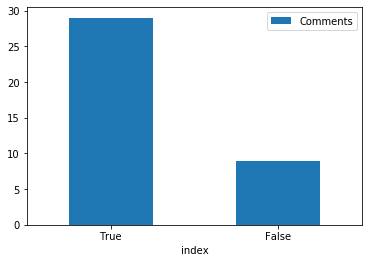

In [56]:
ds_df = ds_comments_raw['Comments'].str.contains('|'.join(key_words), regex = True).value_counts()
#pd.DataFrame(ds_df, columns=["Contains", "Count"])

ds_df.reset_index()

ds_df.reset_index().plot.bar(x='index', y='Comments', rot=0)

In [43]:
posts_ds['text'].str.contains('|'.join(key_words), regex = True).value_counts()

True     30
False    20
Name: text, dtype: int64

### Models (NLP)
- Topic detection
- Text classification

### Create a Job Posting Database (Reddit, Linkedin, Indeed, etc)
- Web scrape websites such as Reddit, Linkedin, Indeed for job posts related to data science
- Analyze the job description and requirements
- Create a database for the job posts

### Create a database to store the reddits

project, we have gathered some interesting findings. Initial objectives 

first component: technical work done. what kind of information. 3-4 slides

Here are some findings: 3-4 slides

some bar charts: the distribution charts.

Visuals: put on the slides



classify those who might be a good fit. 

marketting. 

what tools people are interested in 

check those who are in the industry. 

also the promotion of R in market. 

projects is thats needed

another one. stackoverflow. two more sites. 